# Dry Bean

Nama : Naufal Abdullah Rasyiq Zaki


NIM  : 200411100096

## Business Understanding

Tujuan utama dari proyek ini adalah mengembangkan model klasifikasi untuk mengidentifikasi kategori biji-bijian kering berdasarkan fitur yang ada. Hasilnya akan digunakan seperti:


*  Membantu untuk mengklasifikasikan biji-bijian kering dari tujuh jenis kacang yang terdaftar berdasarkan fitur-fitur tertentu.
*   menyediakan alat identifikasi biji-bijian kering sesuai klasifikasi nya



## Data Understanding

Dataset yang digunakan adalah data Dry Bean yang berasal dari website UCI Machine Learning. Data ini merupakan sebuah dataset kumpulan gambar biji-bijian dari tujuh jenis kacang yang berbeda menggunakan kamera resolusi tinggi. Dataset yang digunakan memiliki 13611 data.

### Penjelasan atribut


Berikut ini adalah penjelasan atribut atribut yang digunakan:

1. Area (A) : Luas zona kacang dan jumlah piksel dalam batasnya.
2. Perimeter (P) : Keliling kacang didefinisikan sebagai panjang tepinya.
3. Major axis length (L) : Jarak antara ujung-ujung garis terpanjang yang dapat ditarik dari sebuah kacang.
4. Minor axis length (l) : Garis terpanjang yang dapat ditarik dari kacang sambil berdiri tegak lurus terhadap sumbu utama.
5. Aspect ratio (K) : Mendefinisikan hubungan antara L dan l.
6. Eccentricity (Ec) : Eksentrisitas elips yang momennya sama dengan daerah.
7. Convex area (C) : Jumlah piksel dalam poligon cembung terkecil yang dapat memuat luas biji kacang.
8. Equivalent diameter (Ed) : Diameter lingkaran yang luasnya sama dengan luas biji kacang.
9. Extent (Ex) : Rasio piksel dalam kotak pembatas dengan area kacang.
10. Solidity (S) : Juga dikenal sebagai konveksitas. Rasio piksel pada cangkang cembung dengan piksel pada kacang.
11. Roundness (R): Dihitung dengan rumus berikut: (4piA)/(P^2)
12. Compactness (CO) : Mengukur kebulatan suatu benda: Ed/L
13. ShapeFactor1  (SF1) : Faktor Bentuk 1
14. ShapeFactor2  (SF2) : Faktor Bentuk 2
15. ShapeFactor3  (SF3) : Faktor Bentuk 3
16. ShapeFactor4  (SF4) : Faktor Bentuk 4
17. class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)



### Library

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler



### Install dataset dry bean


In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
import pandas as pd

# Memuat file CSV
df = pd.read_excel('/content/drive/MyDrive/Proyek_Sain_Data/dry+bean+dataset/DryBeanDataset/Dry_Bean_Dataset.xlsx')

# Menampilkan tabel
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [50]:
X = df.drop(['Class'], axis=1)
y = df["Class"]


### Missing value

Cek apakah ada missing value pada dataset

In [51]:
print(X.isnull().sum())  # Menampilkan jumlah missing value untuk setiap kolom

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


### Visualisasi

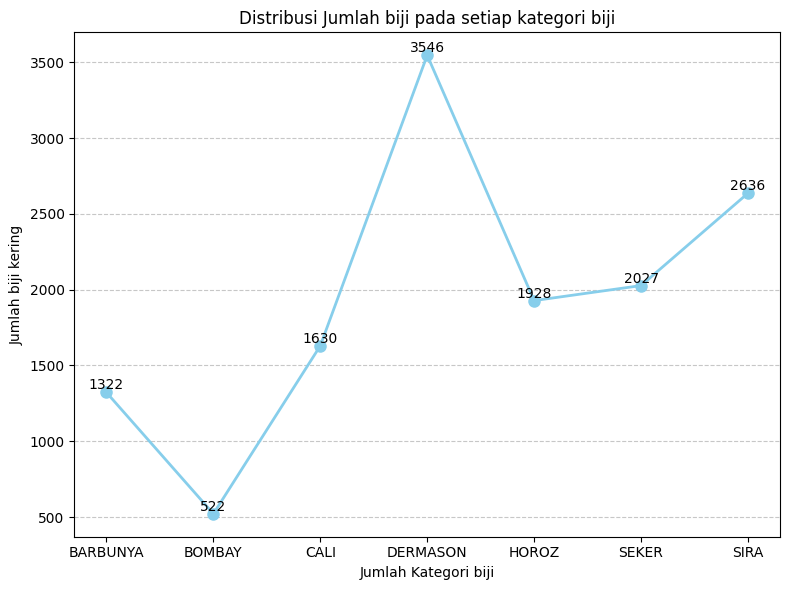

In [52]:
# Menghitung jumlah biji kering dengan nilai biji tertentu
bean_counts = y.value_counts().sort_index()

# Membuat diagram garis untuk distribusi jumlah biji kering berdasarkan jumlah biji (bean)
plt.figure(figsize=(8, 6))
plt.plot(bean_counts.index, bean_counts.values, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('Jumlah Kategori biji')
plt.ylabel('Jumlah biji kering')
plt.title('Distribusi Jumlah biji pada setiap kategori biji')
plt.xticks(bean_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label jumlah biji kering pada setiap titik pada diagram
for i, count in enumerate(bean_counts.values):
    plt.text(bean_counts.index[i], count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


Pada distribusi class ini, terlihat bahwa data dominan biji dermanson berjumlah 3546 biji, sira berjumlah 2636, seker berjumlah 2027, horoz berjumlah 1928, barbuya berjumlah 1322 dan data yang paling sedikit yaitu biji bombay yang hanya berjumlah 522

### Seleksi Fitur

sebelum melakukan preprocessing data alangkah baiknya untuk menyeleksikan fitur fitur yang menurut kita adalah fitur yang tidak berpengaruh terhadap dataset dan mengurangi beban dataset agar tidak menyebabkan overfitting

Disini saya menggunakan sckit learn untuk melakukan selection pada fitur
- yang pertama saya menentukan banyaknya fitur terdapat N = banyak fitur, fitur yang ada didataset adalah 16 fitur
- Jumlah fitur terbaik yang terpilih disesuaikan dengan nilai K di atas
- ambil data data pada setiap fitur menggunakan funtion colomns dan nama pada fitur akan dimasukan kedalam selected_feature_names
- lalu proses melakukan perhitungan statistik ANOVA dengan rumus

$$
F = \frac{MSB}{MSW}
$$
MSB atau mean square antar kelompok (mean square between groups). dapat dari rumus ini :

$$
MSB = \frac{\sum_{i=1}^{k} n_i (\bar{X}_i - \bar{X}_{\text{total}})^2}{k - 1}
$$
dan MSW atau mean square dalam kelompok (mean square within groups)

$$
MSW = \frac{\sum_{i=1}^{k} \sum_{j=1}^{n_i} (X_{ij} - \bar{X}_i)^2}{N - k}
$$
Untuk hasil akhirnya saya menghapus 9 fitur yang menurut saya tidak akan berpengaruh terhadap dataset

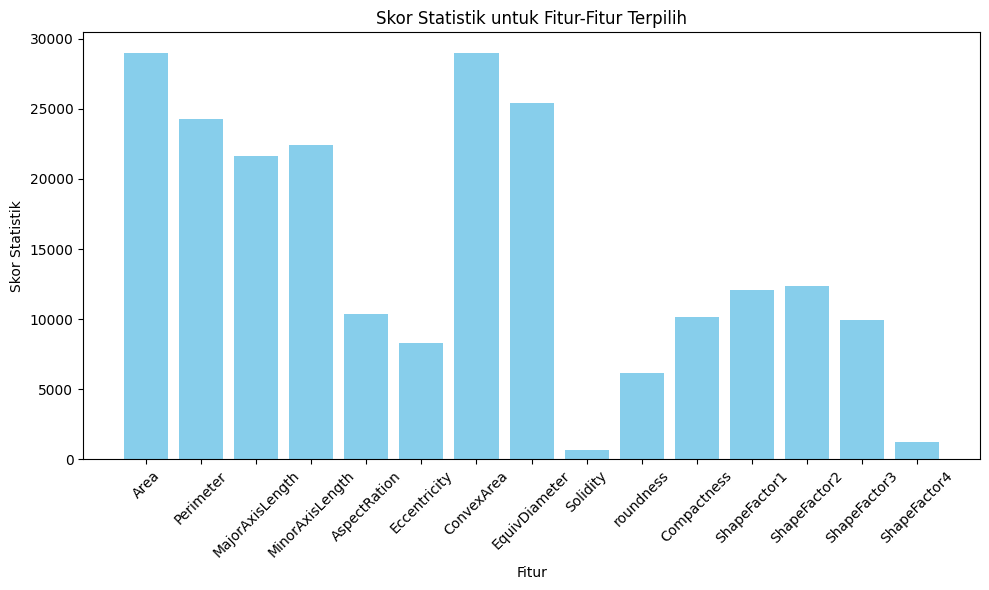

In [53]:

selector = SelectKBest(score_func=f_classif, k=15)  # K adalah jumlah fitur terbaik yang akan dipilih

# # Lakukan seleksi fitur
selector.fit(X, y)

# # Tampilkan hasil seleksi fitur
# # Jumlah fitur terbaik yang terpilih disesuaikan dengan nilai K di atas
selected_features = selector.get_support(indices=True)
feature_names = X.columns

# #Pilih nama-nama fitur yang dipilih
selected_feature_names = [feature_names[i] for i in selected_features]

# # Sisa kode Anda tetap sama
# # Hitung skor statistik untuk setiap fitur
scores = selector.scores_[selected_features]


# # Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, scores, color='skyblue')
plt.xlabel('Fitur')
plt.ylabel('Skor Statistik')
plt.title('Skor Statistik untuk Fitur-Fitur Terpilih')
plt.xticks(rotation=45)
plt.tight_layout()

# # Menampilkan grafik
plt.show()

In [54]:
X = df.drop(['MinorAxisLength','AspectRation','Solidity','roundness','ShapeFactor4','Class'], axis=1)
X

,Area,Perimeter,MajorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
0,28395,610.291,208.178117,0.549812,28715,190.141097,0.763923,0.913358,0.007332,0.003147,0.834222
1,28734,638.018,200.524796,0.411785,29172,191.272750,0.783968,0.953861,0.006979,0.003564,0.909851
2,29380,624.110,212.826130,0.562727,29690,193.410904,0.778113,0.908774,0.007244,0.003048,0.825871
3,30008,645.884,210.557999,0.498616,30724,195.467062,0.782681,0.928329,0.007017,0.003215,0.861794
4,30140,620.134,201.847882,0.333680,30417,195.896503,0.773098,0.970516,0.006697,0.003665,0.941900
...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,0.765002,42508,231.515799,0.714574,0.801865,0.006858,0.001749,0.642988
13607,42101,757.499,281.576392,0.735702,42494,231.526798,0.799943,0.822252,0.006688,0.001886,0.676099
13608,42139,759.321,281.539928,0.734065,42569,231.631261,0.729932,0.822730,0.006681,0.001888,0.676884
13609,42147,763.779,283.382636,0.741055,42667,231.653248,0.705389,0.817457,0.006724,0.001852,0.668237


untuk membuang fitur yang skor statistik nya rendah


## Preprocesing Data


### Split data

train_test_split adalah suatu fungsi dalam library scikit-learn yang digunakan untuk membagi dataset menjadi dua set, yaitu set pelatihan (training set) dan set pengujian (testing set). Pemisahan ini bertujuan untuk melakukan pelatihan model pada set pelatihan dan menguji kinerja model pada set pengujian. Fungsi ini sangat umum digunakan dalam proses machine learning untuk menghindari overfitting dan mengevaluasi kemampuan generalisasi dari model yang telah dilatih

1. test_size (opsional): Menentukan ukuran set pengujian sebagai proporsi dari seluruh dataset. Nilai ini bisa berupa pecahan (misalnya, 0.2 untuk 20%) atau bilangan bulat yang menyatakan jumlah sampel yang akan ditempatkan di set pengujian.

2. random_state (opsional): Digunakan untuk mengontrol randomization selama pembagian dataset. Jika nilai ini diberikan, pemisahan dataset akan tetap konsisten setiap kali fungsi ini dijalankan

In [55]:
from sklearn.model_selection import train_test_split


# Pembagian data menjadi data latih dan data uji (80% data latih, 20% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
X_train.shape


(10888, 11)

In [57]:
y_train

11073    DERMASON
13172    DERMASON
11587    DERMASON
12492    DERMASON
430         SEKER
           ...   
5191         CALI
13418    DERMASON
5390         CALI
860         SEKER
7270        HOROZ
Name: Class, Length: 10888, dtype: object

### Normalisasi Data

Setelah melakukan understanding data maka melakukan preprocessing yang dimana data akan di jadikan antara 0 sampai 1

dengan menggunakan minmaxScaller untuk menormalisasi data , dan menggunakan train_test_split untuk mendapatkan data training dan data testing

rumus MinmaxScaler:

$$
\text{Scaled Value} = \frac{\text{Original Value} - \text{Min}}{\text{Max} - \text{Min}}
$$
- Original Value adalah nilai asli dari fitur.

- Min adalah nilai minimum dari fitur.

- Max adalah nilai maksimum dari fitur.


1. fit_transform Fungsinya ini menghitung parameter normalisasi dari dataset (seperti nilai minimum dan maksimum) dan kemudian mengaplikasikan normalisasi pada dataset tersebut. Fungsi ini berguna untuk menghitung parameter normalisasi berdasarkan data pelatihan dan sekaligus menerapkan normalisasi tersebut.

2. Setelah kita telah menggunakan fit_transform pada data pelatihan, kita dapat menggunakan metode transform pada data pengujian (dan data lainnya yang ingin dinormalisasi) menggunakan parameter normalisasi yang telah dihitung sebelumnya. Metode ini hanya melakukan normalisasi tanpa perlu menghitung parameter normalisasi lagi.



In [58]:
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)
x = pd.DataFrame(X_train,columns=X.columns)
x

,Area,Perimeter,MajorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3
11073,29076,636.353,235.061516,0.740272,29490,192.407674,0.693524,0.818542,0.008084,0.002239,0.670011
13172,38091,755.186,271.077683,0.748513,38716,220.224811,0.706318,0.812405,0.007117,0.001912,0.660002
11587,30969,651.527,230.164083,0.664964,31318,198.572293,0.733689,0.862742,0.007432,0.002540,0.744324
12492,34589,685.425,253.001232,0.723664,34965,209.857291,0.784331,0.829471,0.007314,0.002136,0.688023
430,35954,710.093,251.660769,0.690581,36380,213.958067,0.794564,0.850184,0.007000,0.002256,0.722814
...,...,...,...,...,...,...,...,...,...,...,...
5191,83266,1117.778,448.473710,0.847920,84030,325.603384,0.797239,0.726026,0.005386,0.000923,0.527113
13418,39857,755.392,283.623668,0.774448,40330,225.272077,0.692154,0.794264,0.007116,0.001747,0.630855
5390,90004,1156.599,456.836383,0.833583,90790,338.521273,0.783939,0.741012,0.005076,0.000944,0.549099
860,38426,711.412,246.696608,0.593467,38799,221.191100,0.752094,0.896612,0.006420,0.002559,0.803913


## Modelling

### Random Forest

Rumus umum Random Forest
$$f(x) = \text{sign}\left(\frac{1}{N} \sum_{i=1}^{N} f_i(x) - \theta\right)
$$
Dengan penjelasan:
$$\\\ N \text{ adalah jumlah pohon dalam hutan, } \\\ f_i(x) \text{ adalah prediksi dari pohon ke-} i,\\\ \text{ dan } \theta \text{ adalah ambang batas (threshold).}$$


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


#Buat model Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100)
#Latih model
random_forest_model.fit(X_train, y_train)
#Prediksi dengan model
random_forest_predictions = random_forest_model.predict(X_test)
#Evaluasi kinerja model
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)

### Decision Tree

Rumus umum Decision Tree:
$$
f(x) = \text{sign}\left(\text{Node}(x) - \theta\right)
$$
Dengan penjelasan:
$$
\text{Node}(x):\text{Fungsi keputusan pohon keputusan untuk input } x
\\\ \theta: \text{ adalah ambang batas (threshold).}
$$


In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier()
#Latih model
decision_tree_model.fit(X_train, y_train)
#Prediksi dengan model
decision_tree_predictions = decision_tree_model.predict(X_test)
#Evaluasi kinerja model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

### Logistic Regresion

Rumus umum Logistic Regression:
$$
f(x) = \frac{1}{1 + \exp(-\left(\sum_{i=1}^{N} w_i x_i + b\right))}
$$
Dengan penjelasan:
$$
\begin{align*}
f(x) & : \text{Fungsi keputusan Logistic Regression untuk input } x \\
w_i & : \text{Bobot input ke-} i \\
x_i & : \text{Input ke-} i \\
b & : \text{Bias}
\end{align*}
$$


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()

#Latih model
model.fit(X_train_scaler, y_train)

#Prediksi dengan model
logistic_regression_predictions = model.predict(X_test)

#Evaluasi kinerja model
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Neural Network

Rumus umum ANN:
$$
f(x) = \text{sign}\left(\sum_{j=1}^{M} w_j g\left(\sum_{i=1}^{N} w_{ij} x_i + b_j\right) + b\right)
$$
Dengan penjelasan:
$$
\begin{align*}
f(x) & : \text{Fungsi keputusan ANN untuk input } x \\
w_j & : \text{Bobot output ke-} j \\
g(\cdot) & : \text{Fungsi aktivasi} \\
w_{ij} & : \text{Bobot input ke-} j \\
x_i & : \text{Input ke-} i \\
b_j & : \text{Bias ke-} j \\
b & : \text{Bias output}
\end{align*}
$$


In [62]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

#Buat model Jaringan Saraf Tiruan
neural_network_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

#Latih model
neural_network_model.fit(X_train_scaler, y_train)

#Prediksi dengan model
neural_network_predictions = neural_network_model.predict(X_test)

#Evaluasi kinerja model
neural_network_accuracy = accuracy_score(y_test, neural_network_predictions)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


## Evaluasi

Akurasi yang saya dapat adalah paling tinggi di model yang lain, maka saya memilih metode random forest, alasan lainnya mengapa menggunakan Random Forest Dengan mempertimbangkan akurasinya lebih tinggi dari pada model yang lain.

In [63]:
print("Akurasi decision_tree:", decision_tree_accuracy)
print("Akurasi Random Forest:", random_forest_accuracy)
print("Akurasi Regresi Logistik:", logistic_regression_accuracy)
print("Akurasi neural_network:", neural_network_accuracy)

Akurasi decision_tree: 0.8788101358795446
Akurasi Random Forest: 0.9063532868160118
Akurasi Regresi Logistik: 0.04296731546088873
Akurasi neural_network: 0.04296731546088873


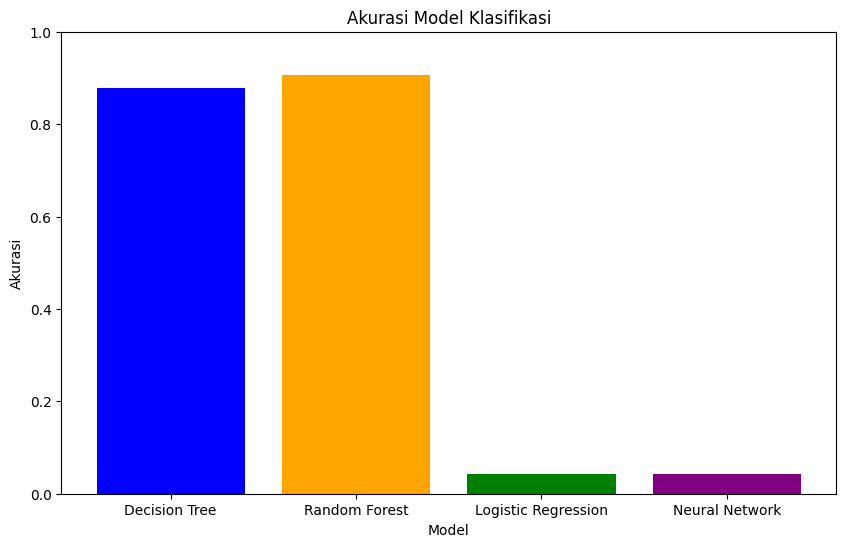

In [64]:
import matplotlib.pyplot as plt

# Data akurasi
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Neural Network']
accuracies = [decision_tree_accuracy, random_forest_accuracy, logistic_regression_accuracy, neural_network_accuracy]

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'purple'])
plt.ylim(0, 1)  # Menetapkan batas y-axis antara 0 dan 1
plt.title('Akurasi Model Klasifikasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()


Save Model

In [65]:
import joblib
joblib.dump(random_forest_model, '/content/drive/MyDrive/Proyek_Sain_Data/dry+bean+dataset/Model/saved_data.joblib')

['/content/drive/MyDrive/Proyek_Sain_Data/dry+bean+dataset/Model/saved_data.joblib']